Saving Play Store Data.csv to Play Store Data.csv


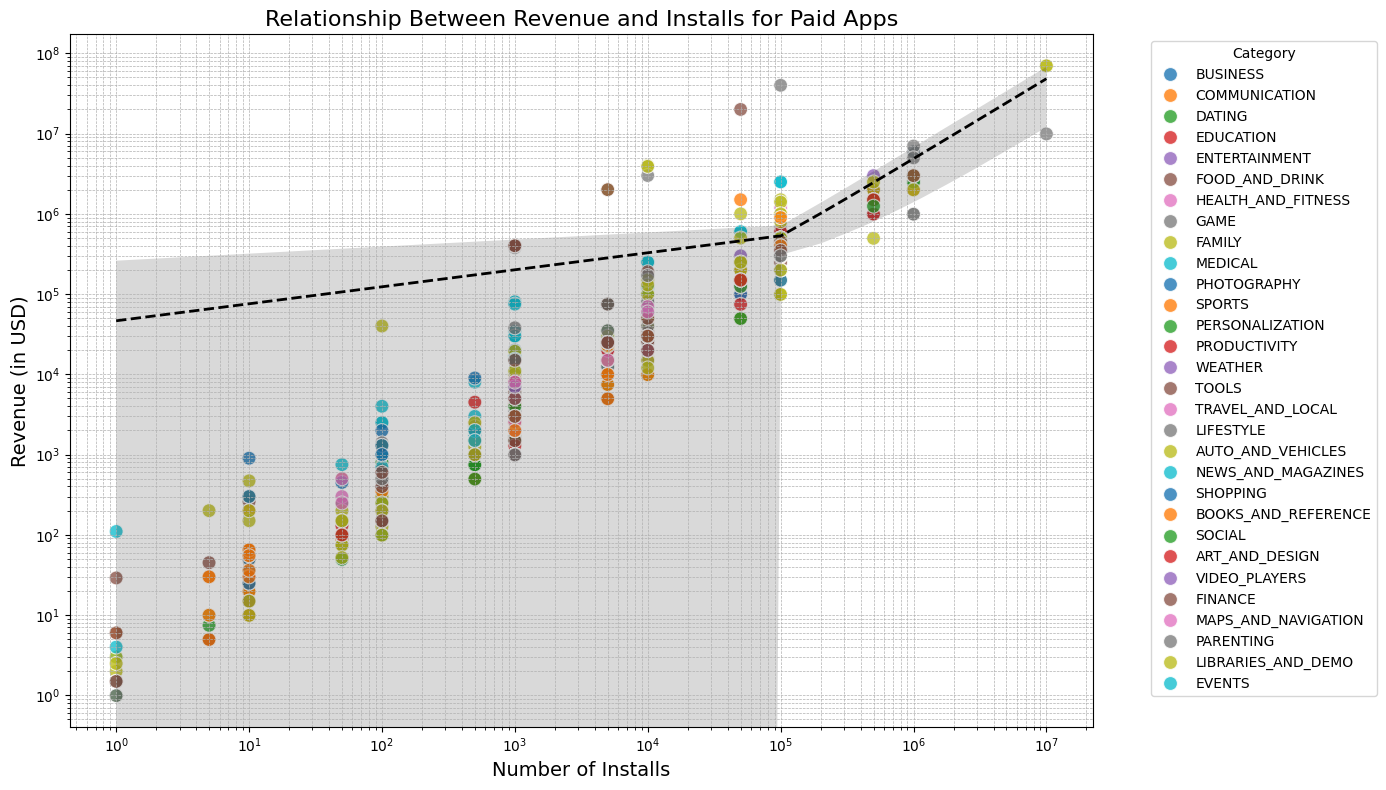

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Read the CSV file
data = pd.read_csv('Play Store Data.csv')

# Data cleaning and preparation
# Filter for paid apps only
paid_apps = data[data['Type'] == 'Paid'].copy()

# Clean and convert `Installs` and `Price` to numeric values
paid_apps['Installs'] = paid_apps['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(float)
paid_apps['Price'] = paid_apps['Price'].str.replace('$', '', regex=False).astype(float)

# Calculate revenue
paid_apps['Revenue'] = paid_apps['Installs'] * paid_apps['Price']

# Remove rows with missing or zero values in key columns
paid_apps = paid_apps.dropna(subset=['Revenue', 'Installs', 'Category'])
paid_apps = paid_apps[(paid_apps['Revenue'] > 0) & (paid_apps['Installs'] > 0)]

# Create the scatter plot
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='tab10',
    alpha=0.8,
    edgecolor='w',
    s=100
)

# Add a trendline
sns.regplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    scatter=False,
    color='black',
    line_kws={"linewidth": 2, "linestyle": "dashed"}
)

# Customize the plot
plt.title('Relationship Between Revenue and Installs for Paid Apps', fontsize=16)
plt.xlabel('Number of Installs', fontsize=14)
plt.ylabel('Revenue (in USD)', fontsize=14)
plt.xscale('log')  # Log scale for better visualization of spread
plt.yscale('log')  # Log scale for revenue
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
import pandas as pd
from datetime import datetime
import pytz
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('Play Store Data.csv')

# Data Cleaning
# Clean and convert 'Installs' to numeric
data['Installs'] = (
    data['Installs']
    .str.replace('[+,]', '', regex=True)  # Remove commas and plus signs
    .str.strip()  # Remove leading/trailing whitespace
)

# Remove rows where 'Installs' contains invalid values (e.g., 'Free')
data = data[data['Installs'].str.isnumeric()]

# Convert 'Installs' to float
data['Installs'] = data['Installs'].astype(float)

# Convert 'Size' to numeric (assume KB, MB, and GB are properly formatted in 'Size' column)
def convert_size(size):
    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) * 1_000_000
        elif 'k' in size:
            return float(size.replace('k', '')) * 1_000
        elif 'G' in size:
            return float(size.replace('G', '')) * 1_000_000_000
    return None

data['Size'] = data['Size'].apply(convert_size)

# Convert 'Last Updated' to datetime
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Filter Data
filtered_data = data[
    (data['Rating'] >= 4.0) &
    (data['Size'] >= 10_000_000) &
    (data['Last Updated'].dt.month == 1)
]

# Aggregate Data
aggregated_data = (
    filtered_data.groupby('Category')
    .agg({'Rating': 'mean', 'Reviews': 'sum', 'Installs': 'sum'})
    .reset_index()
)

# Select Top 10 Categories by Installs
top_categories = aggregated_data.nlargest(10, 'Installs')

# Time Restriction
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
start_time = datetime.strptime("15:00", "%H:%M").time()
end_time = datetime.strptime("17:00", "%H:%M").time()

if start_time <= current_time <= end_time:
    # Create Grouped Bar Chart
    fig = go.Figure()

    # Add bars for average rating
    fig.add_trace(
        go.Bar(
            x=top_categories['Category'],
            y=top_categories['Rating'],
            name='Average Rating',
            marker_color='blue'
        )
    )

    # Add bars for total reviews
    fig.add_trace(
        go.Bar(
            x=top_categories['Category'],
            y=top_categories['Reviews'],
            name='Total Reviews',
            marker_color='orange'
        )
    )

    # Update layout
    fig.update_layout(
        title='Comparison of Average Rating and Total Reviews for Top 10 Categories',
        xaxis_title='Category',
        yaxis_title='Value',
        barmode='group',
        title_x=0.5
    )

    # Show the figure
    fig.show()
else:
    print("The graph is not available outside the time range of 3 PM to 5 PM IST.")


The graph is not available outside the time range of 3 PM to 5 PM IST.


<ipython-input-3-5372b5811957>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Installs'] = data['Installs'].astype(float)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install pandas plotly pytz
import pandas as pd
from datetime import datetime
import pytz
import plotly.express as px

data = pd.read_csv('/content/Play Store Data.csv')


# Data Cleaning
data = data[data['Installs'].str.replace('[+,]', '', regex=True).str.isnumeric()]
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True).astype(float)

# Filter Categories
filtered_data = data[~data['Category'].str.startswith(('A', 'C', 'G', 'S'))]
filtered_data = filtered_data[filtered_data['Installs'] > 1_000_000]

# Aggregate installs by category
category_installs = filtered_data.groupby('Category')['Installs'].sum().reset_index()

# Select Top 5 Categories
top_categories = category_installs.nlargest(5, 'Installs')
top_categories['Country'] = ['USA', 'India', 'Brazil', 'Russia', 'Germany']  # Example country mapping

# Time-based Restriction
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
start_time = datetime.strptime("18:00", "%H:%M").time()
end_time = datetime.strptime("20:00", "%H:%M").time()

if start_time <= current_time <= end_time:
    # Create Choropleth Map
    fig = px.choropleth(
        top_categories,
        locations="Country",
        locationmode="country names",
        color="Installs",
        hover_name="Category",
        title="Global Installs by Top App Categories",
        color_continuous_scale=px.colors.sequential.Plasma,
    )
    fig.update_layout(
        title_x=0.5,
        margin={"r": 0, "t": 50, "l": 0, "b": 0},
    )
    fig.show()
else:
    print("The graph is not available outside the time range of 6 PM to 8 PM IST.")


In [ ]:
import pandas as pd
from datetime import datetime
import pytz
import plotly.graph_objects as go

# Load the dataset
data = pd.read_csv('Play Store Data.csv')

# Data Cleaning
# Clean and convert 'Installs' to numeric
data['Installs'] = (
    data['Installs']
    .str.replace('[+,]', '', regex=True)
    .str.strip()
)

# Remove rows where 'Installs' contains invalid values (e.g., 'Free')
data = data[data['Installs'].str.isnumeric()]

# Convert 'Installs' to float
data['Installs'] = data['Installs'].astype(float)

# Convert 'Last Updated' to datetime
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Apply Filters
filtered_data = data[
    (data['Content Rating'] == 'Teen') &
    (data['App'].str.startswith('E')) &
    (data['Installs'] > 10_000)
]

# Add 'Year-Month' column for aggregation
filtered_data['Year-Month'] = filtered_data['Last Updated'].dt.to_period('M')

# Aggregate Data
aggregated_data = (
    filtered_data.groupby(['Year-Month', 'Category'])
    .agg({'Installs': 'sum'})
    .reset_index()
)

# Calculate Month-over-Month Growth
aggregated_data['MoM Growth'] = (
    aggregated_data.groupby('Category')['Installs']
    .pct_change() * 100
)

# Assign unique colors for each category
categories = aggregated_data['Category'].unique()
colors = {category: f'rgba({255 - i*20}, {100 + i*20}, {150 + i*30}, 0.3)' for i, category in enumerate(categories)}

# Time Restriction
ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist).time()
start_time = datetime.strptime("18:00", "%H:%M").time()
end_time = datetime.strptime("21:00", "%H:%M").time()

if start_time <= current_time <= end_time:
    # Create Time Series Chart
    fig = go.Figure()

    for category in categories:
        category_data = aggregated_data[aggregated_data['Category'] == category]

        # Add line for installs
        fig.add_trace(
            go.Scatter(
                x=category_data['Year-Month'].astype(str),
                y=category_data['Installs'],
                mode='lines',
                name=f'Installs - {category}'
            )
        )

        # Add shaded regions for significant growth
        significant_growth = category_data[category_data['MoM Growth'] > 20]
        fig.add_trace(
            go.Scatter(
                x=significant_growth['Year-Month'].astype(str),
                y=significant_growth['Installs'],
                fill='tozeroy',
                mode='none',
                name=f'Significant Growth - {category}',
                fillcolor=colors[category]  # Assign unique color for shading
            )
        )

    # Update layout
    fig.update_layout(
        title='Trend of Total Installs Over Time by App Category',
        xaxis_title='Time (Year-Month)',
        yaxis_title='Total Installs',
        title_x=0.5
    )

    # Show the figure
    fig.show()
else:
    print("The graph is not available outside the time range of 6 PM to 9 PM IST.")


<ipython-input-15-6b20594aea72>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [2]:
!pip install pandas matplotlib seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = 'Play Store Data.csv'  # Replace with your file path
data = pd.read_csv('/content/Play Store Data.csv')

# Data cleaning
# Convert Installs to numeric
data['Installs'] = data['Installs'].str.replace('[+,]', '', regex=True)
data = data[data['Installs'].str.isnumeric()]  # Remove invalid rows
data['Installs'] = data['Installs'].astype(float)

# Convert Reviews to numeric
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

# Convert Last Updated to datetime
data['Last Updated'] = pd.to_datetime(data['Last Updated'], errors='coerce')

# Filter apps updated within the last year
one_year_ago = datetime.now() - pd.Timedelta(days=365)
filtered_data = data[data['Last Updated'] >= one_year_ago]

# Further filter: Installs >= 100,000 and Reviews > 1,000
filtered_data = filtered_data[(filtered_data['Installs'] >= 100000) & (filtered_data['Reviews'] > 1000)]

# Exclude Genres starting with specific letters
excluded_letters = ('A', 'F', 'E', 'G', 'I', 'K')
filtered_data = filtered_data[~filtered_data['Genres'].str.startswith(excluded_letters)]

# Select relevant columns for correlation matrix
filtered_data = filtered_data[['Installs', 'Rating', 'Reviews']].dropna()

# Check the current time and only plot if between 2 PM and 4 PM IST
current_time = datetime.now().time()
if current_time.hour == 14 or (current_time.hour == 15 and current_time.minute < 60):
    # Generate the correlation matrix
    corr_matrix = filtered_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for Filtered Data')
    plt.show()
else:
    print("The heatmap can only be displayed between 2 PM and 4 PM IST.")


The heatmap can only be displayed between 2 PM and 4 PM IST.
